In [1]:
import os
os.chdir("../")
!pwd

/Users/ravikumar/Developer/M-Tech/bee-project


In [2]:
import pandas as pd
import os
import shutil

In [3]:

df = pd.read_csv("data/bee_data.csv")
df.head()

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


In [4]:
all_species = df[['file', 'subspecies']]['subspecies']

df = df[(all_species != '-1') & (all_species != 'VSH Italian honey bee') & \
    (all_species != 'Western honey bee')]

In [5]:
# use_columns = ['Italian honey bee', 'Russian honey bee', 'Carniolan honey bee', '1 Mixed local stock 2']

In [6]:
italian_honey_bee = df[df['subspecies'] == 'Italian honey bee']

italian_honey_bee_sampled = italian_honey_bee.sample(n=500, random_state=42)

other_classes = df[df['subspecies'] != 'Italian honey bee']

balanced_df = pd.concat([italian_honey_bee_sampled, other_classes])


In [7]:
balanced_df[['file', 'subspecies']]

,file,subspecies
1012,030_666.png,Italian honey bee
946,030_700.png,Italian honey bee
3389,015_761.png,Italian honey bee
3587,015_989.png,Italian honey bee
1222,005_259.png,Italian honey bee
...,...,...
4639,038_353.png,1 Mixed local stock 2
4640,038_435.png,1 Mixed local stock 2
4641,038_421.png,1 Mixed local stock 2
4642,038_347.png,1 Mixed local stock 2


<Axes: xlabel='subspecies'>

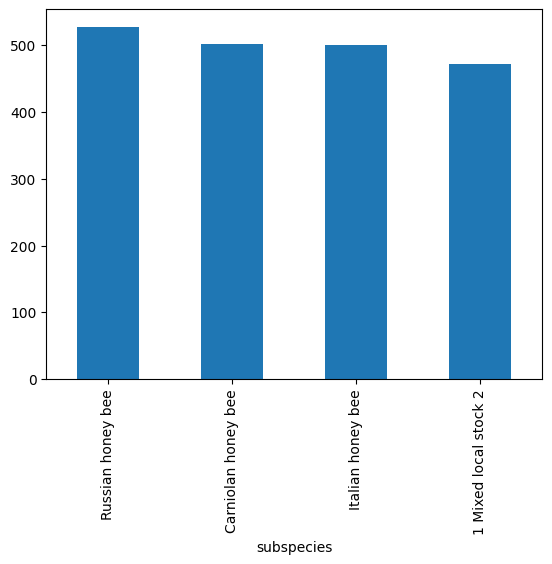

In [10]:
balanced_df['subspecies'].value_counts().plot.bar()

In [32]:
def copy_images(row):
    file_name = row['file']
    subspecies = row['subspecies']
    
    subspecies_folder = os.path.join(dest_folder, subspecies)
    if not os.path.exists(subspecies_folder):
        os.makedirs(subspecies_folder)
    
    src_file_path = os.path.join(src_folder, file_name)
    dest_file_path = os.path.join(subspecies_folder, file_name)
    
    shutil.copy(src_file_path, dest_file_path)

src_folder = 'data/bee_imgs'
dest_folder = 'dataset'

if not os.path.exists(dest_folder):
    os.makedirs(dest_folder)

balanced_df[['file', 'subspecies']].apply(copy_images, axis=1)
print("Images have been copied to respective class folders.")

Images have been copied to respective class folders.
